# Opioids Project: Analysis

Ra'Kira Nelson and Alexa Fahrer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [2]:
opioids_prescriptions = pd.read_csv("data/opioids_clean.csv")
opioids_prescriptions = opioids_prescriptions.copy()
opioids_prescriptions = opioids_prescriptions.drop(columns=["Unnamed: 0"])
opioids_prescriptions

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,relative_year,prescriptions_per_1000,overdose_per_100k
0,1001.0,AUTAUGA,NaN,AUTAUGA COUNTY,ALABAMA,AL,2006,25844.004617,NaN,51328.0,0,0,-4,503.506948,NaN
1,1001.0,AUTAUGA,NaN,AUTAUGA COUNTY,ALABAMA,AL,2007,27528.290608,NaN,52405.0,0,0,-3,525.298933,NaN
2,1001.0,AUTAUGA,NaN,AUTAUGA COUNTY,ALABAMA,AL,2008,30237.508424,NaN,53277.0,0,0,-2,567.552761,NaN
3,1001.0,AUTAUGA,NaN,AUTAUGA COUNTY,ALABAMA,AL,2009,32653.019231,NaN,54135.0,0,0,-1,603.177597,NaN
4,1001.0,AUTAUGA,NaN,AUTAUGA COUNTY,ALABAMA,AL,2010,35530.234473,NaN,54761.0,0,1,0,648.823697,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41892,NaN,ST JOSEPH,NaN,NaN,NaN,IN,2019,74334.684199,NaN,NaN,0,1,9,NaN,NaN
41893,NaN,ST JOHN THE BAPTIST,NaN,NaN,NaN,LA,2019,13563.211319,NaN,NaN,0,1,9,NaN,NaN
41894,NaN,SAINTE GENEVIEVE,NaN,NaN,NaN,MO,2019,2500.201613,NaN,NaN,0,1,9,NaN,NaN
41895,NaN,DESOTO,NaN,NaN,NaN,MS,2019,53404.676267,NaN,NaN,0,1,9,NaN,NaN


In [3]:
opioids_deaths = pd.read_csv("data/opioids_deaths.csv")
opioids_deaths = opioids_deaths.copy()
opioids_deaths = opioids_deaths.drop(columns=["Unnamed: 0"])
opioids_deaths

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,relative_year,prescriptions_per_1000,overdose_per_100k
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,-4,608.685973,8.385514
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,-3,641.909781,10.226463
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,-2,670.836935,9.596198
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,-1,690.868880,12.149912
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,0,739.373276,8.051897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,55133,WAUKESHA,"Waukesha County, WI",WAUKESHA COUNTY,WISCONSIN,WI,2015,200375.123762,34.0,396377.0,0,1,5,505.516525,8.577692
2620,55133,WAUKESHA,NaN,NaN,NaN,WI,2016,192636.391662,NaN,NaN,0,1,6,NaN,NaN
2621,55133,WAUKESHA,NaN,NaN,NaN,WI,2017,154116.663589,NaN,NaN,0,1,7,NaN,NaN
2622,55133,WAUKESHA,NaN,NaN,NaN,WI,2018,126187.189934,NaN,NaN,0,1,8,NaN,NaN


## Control States

> ### NOTE:
> Based off the analysis found in `opioid_project_analysis.ipynb`, ['MICHIGAN', 'PENNSYLVANIA', 'TENNESSEE'] may be reasonable control states to explore average population size, overdose trends, and prescription shipment trends before 2010. However, these three states together don't seem to do well in the plots below.
>
> There's also the top 10 states that have similar:
> -  **overdose trend as pre 2010 Florida:** ['UTAH', 'MARYLAND', 'IOWA', 'NEBRASKA', 'PENNSYLVANIA', 'COLORADO', 'CALIFORNIA', 'SOUTH CAROLINA', 'MICHIGAN', 'TENNESSEE']
> - **prescription shipment trend as pre 2010 Florida:** ['DELAWARE', 'NEW MEXICO', 'OKLAHOMA', 'MICHIGAN', 'PENNSYLVANIA', 'OREGON', 'TENNESSEE', 'NEVADA', 'KENTUCKY', 'OHIO']
>
> *notice ['MICHIGAN', 'PENNSYLVANIA', 'TENNESSEE'] in the intersection*


In [ ]:
"""
right now, using 2 different sets of control states for prescription shipments and overdose
"""

# control states for prescription shipments: Delaware, New Mexico
control_states_prescriptions = [
    "DELAWARE",
    "NEW MEXICO",
]
opioids_states_prescriptions = opioids_prescriptions[
    opioids_prescriptions["state"].isin(control_states_prescriptions + ["FLORIDA"])
]

# control states for overdoses: Colorado, Michigan, Nevada
control_states_od = [
    "COLORADO",
    "MICHIGAN",
    "NEVADA",
]
opioids_states_od = opioids_deaths[
    opioids_deaths["state"].isin(control_states_od + ["FLORIDA"])
]

## Plots

### Pre-Trend Checks: Florida vs Control States

Control states for prescription shipments: Delaware, New Mexico

Control states for overdoses: Colorado, Michigan, Nevada

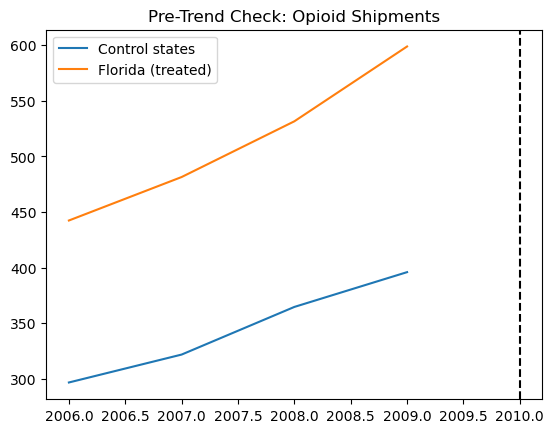

In [5]:
pre_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] < 2010
]

mean_trends = (
    pre_prescriptions.groupby(["policy_state", "year"])["prescriptions_per_1000"]
    .mean()
    .reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["prescriptions_per_1000"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Shipments")
plt.show()

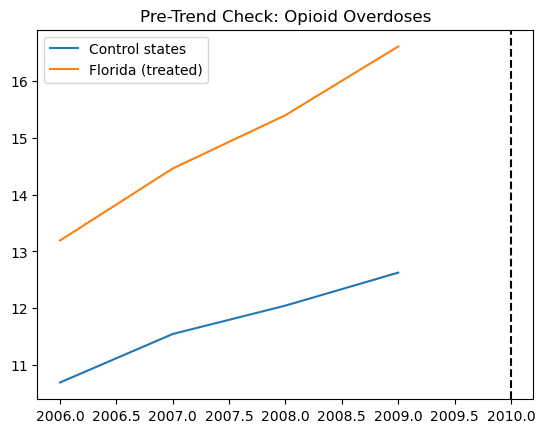

In [6]:
pre_od = opioids_states_od[opioids_states_od["year"] < 2010]

mean_trends = (
    pre_od.groupby(["policy_state", "year"])["overdose_per_100k"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["overdose_per_100k"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Overdoses")
plt.show()

### Pre-Post: Florida

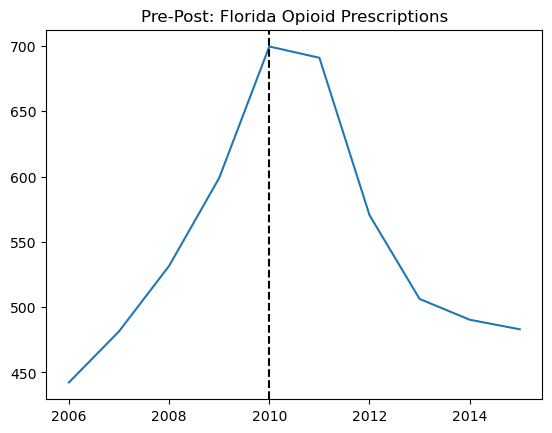

In [7]:
fl = opioids_states_prescriptions[opioids_states_prescriptions["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Prescriptions")
plt.show()

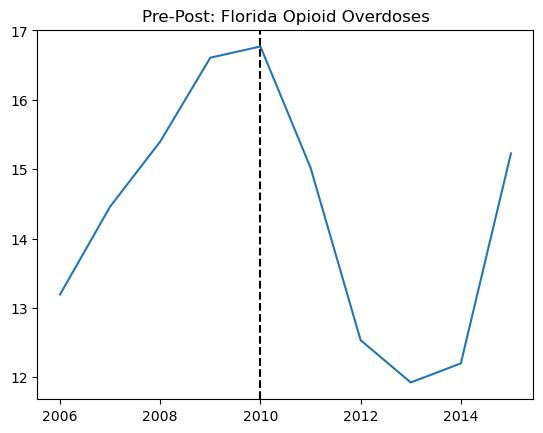

In [8]:
fl = opioids_states_od[opioids_states_od["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.show()

### Difference-in-Difference

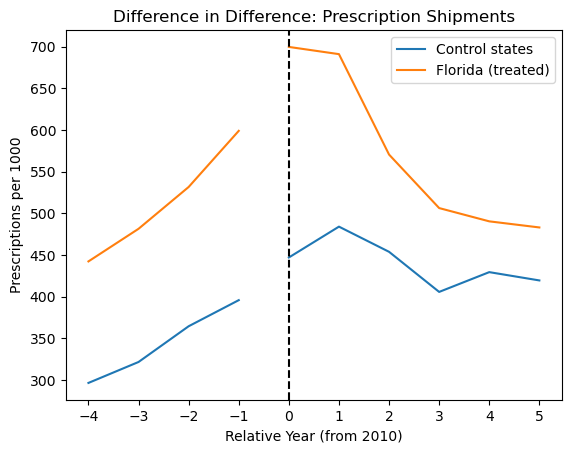

In [9]:
colors = ["tab:blue", "tab:orange"]
post_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] >= 2010
]

pre_prescription_trends = (
    pre_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .mean()
    .reset_index()
)

post_prescription_trends = (
    post_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .mean()
    .reset_index()
)

fig_pres, ax_pres = plt.subplots()

# part of the graph before 2010
for group, d in pre_prescription_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    ax_pres.plot(
        d["relative_year"],
        d["prescriptions_per_1000"],
        label=label,
        color=colors[group],
    )

# part of graph after 2010
for group, d in post_prescription_trends.groupby("policy_state"):
    ax_pres.plot(d["relative_year"], d["prescriptions_per_1000"], color=colors[group])

ax_pres.axvline(0, color="black", linestyle="--")
ax_pres.set(
    title="Difference in Difference: Prescription Shipments",
    xlabel="Relative Year (from 2010)",
    ylabel="Prescriptions per 1000",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_pres.legend()
plt.show()

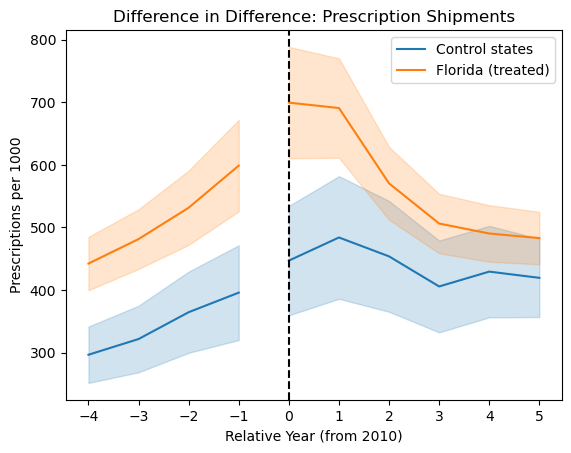

In [10]:
colors = ["tab:blue", "tab:orange"]
post_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] >= 2010
]

pre_prescription_trends = (
    pre_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_prescription_trends["se"] = pre_prescription_trends["std"] / np.sqrt(
    pre_prescription_trends["count"]
)

post_prescription_trends = (
    post_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_prescription_trends["se"] = post_prescription_trends["std"] / np.sqrt(
    post_prescription_trends["count"]
)


fig_pres, ax_pres = plt.subplots()

# part of the graph before 2010
for group, d in pre_prescription_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_prescription_trends.groupby("policy_state"):
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_pres.axvline(0, color="black", linestyle="--")
ax_pres.set(
    title="Difference in Difference: Prescription Shipments",
    xlabel="Relative Year (from 2010)",
    ylabel="Prescriptions per 1000",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_pres.legend()
plt.show()

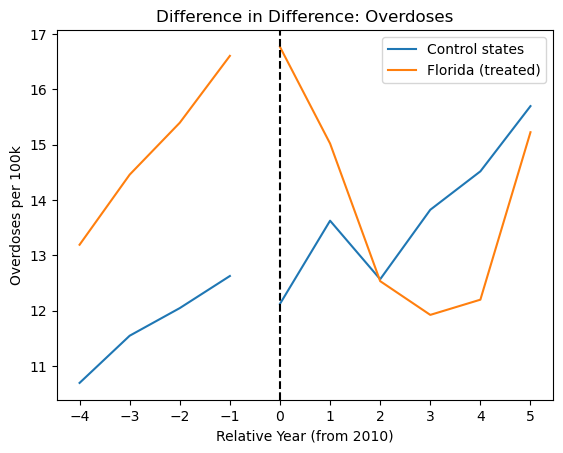

In [11]:
post_od = opioids_states_od[opioids_states_od["year"] >= 2010]

pre_overdose_trends = (
    pre_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .mean()
    .reset_index()
)

post_overdose_trends = (
    post_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .mean()
    .reset_index()
)

fig_post, ax_post = plt.subplots()

# part of the graph before 2010
for group, d in pre_overdose_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    ax_post.plot(
        d["relative_year"],
        d["overdose_per_100k"],
        label=label,
        color=colors[group],
    )

# part of the graph after 2010
for group, d in post_overdose_trends.groupby("policy_state"):
    ax_post.plot(
        d["relative_year"],
        d["overdose_per_100k"],
        color=colors[group],
    )

ax_post.axvline(0, color="black", linestyle="--")
ax_post.set(
    title="Difference in Difference: Overdoses",
    xlabel="Relative Year (from 2010)",
    ylabel="Overdoses per 100k",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_post.legend()
plt.show()

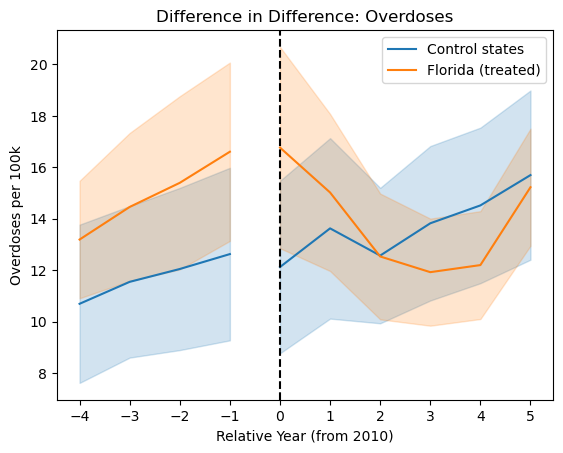

In [12]:
colors = ["tab:blue", "tab:orange"]
post_od = opioids_states_od[opioids_states_od["year"] >= 2010]

pre_overdose_trends = (
    pre_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_overdose_trends["se"] = pre_overdose_trends["std"] / np.sqrt(
    pre_overdose_trends["count"]
)

post_overdose_trends = (
    post_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_overdose_trends["se"] = post_overdose_trends["std"] / np.sqrt(
    post_overdose_trends["count"]
)


fig_post, ax_post = plt.subplots()

# part of the graph before 2010
for group, d in pre_overdose_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_overdose_trends.groupby("policy_state"):
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_post.axvline(0, color="black", linestyle="--")
ax_post.set(
    title="Difference in Difference: Overdoses",
    xlabel="Relative Year (from 2010)",
    ylabel="Overdoses per 100k",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_post.legend()
plt.show()

## Try: Regression

In [13]:
import statsmodels.formula.api as smf

model = smf.ols(
    "prescriptions_per_1000 ~ post * policy_state + C(fips)",
    data=opioids_states_prescriptions,
).fit(cov_type="cluster", cov_kwds={"groups": opioids_states_prescriptions["state"]})

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     prescriptions_per_1000   R-squared:                       0.799
Model:                                OLS   Adj. R-squared:                  0.776
Method:                     Least Squares   F-statistic:                 7.505e-12
Date:                    Sun, 30 Nov 2025   Prob (F-statistic):               1.00
Time:                            17:33:46   Log-Likelihood:                -6263.4
No. Observations:                    1013   AIC:                         1.274e+04
Df Residuals:                         908   BIC:                         1.325e+04
Df Model:                             104                                         
Covariance Type:                  cluster                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

/Users/alexafahrer/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 105, but rank is 29
  warnings.warn('covariance of constraints does not have full '
/Users/alexafahrer/miniforge3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1884: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
